<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


*   Identify the distribution of data in the dataset.

*   Identify outliers in the dataset.

*   Remove outliers from the dataset.

*   Identify correlation between features in the dataset.


***


## Hands on Lab


Import the pandas module.


In [1]:
import pandas as pd

Load the dataset into a dataframe.


In [2]:
df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

In [4]:
df.head()

,Respondent,MainBranch,Hobbyist,OpenSourcer,OpenSource,Employment,Country,Student,EdLevel,UndergradMajor,...,WelcomeChange,SONewContent,Age,Gender,Trans,Sexuality,Ethnicity,Dependents,SurveyLength,SurveyEase
0,4,I am a developer by profession,No,Never,The quality of OSS and closed source software ...,Employed full-time,United States,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,22.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Easy
1,9,I am a developer by profession,Yes,Once a month or more often,The quality of OSS and closed source software ...,Employed full-time,New Zealand,No,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,NaN,23.0,Man,No,Bisexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
2,13,I am a developer by profession,Yes,Less than once a month but more than once per ...,"OSS is, on average, of HIGHER quality than pro...",Employed full-time,United States,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",...,Somewhat more welcome now than last year,Tech articles written by other developers;Cour...,28.0,Man,No,Straight / Heterosexual,White or of European descent,Yes,Appropriate in length,Easy
3,16,I am a developer by profession,Yes,Never,The quality of OSS and closed source software ...,Employed full-time,United Kingdom,No,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",NaN,...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,26.0,Man,No,Straight / Heterosexual,White or of European descent,No,Appropriate in length,Neither easy nor difficult
4,17,I am a developer by profession,Yes,Less than once a month but more than once per ...,The quality of OSS and closed source software ...,Employed full-time,Australia,No,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",...,Just as welcome now as I felt last year,Tech articles written by other developers;Indu...,29.0,Man,No,Straight / Heterosexual,Hispanic or Latino/Latina;Multiracial,No,Appropriate in length,Easy


In [8]:
df.shape

(11398, 85)

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [16]:
missing_data = df['ConvertedComp'].isnull()
missing_data.head()
missing_data.sum()

816

In [14]:
# your code goes here
df['ConvertedComp'].describe()

count    1.058200e+04
mean     1.315967e+05
std      2.947865e+05
min      0.000000e+00
25%      2.686800e+04
50%      5.774500e+04
75%      1.000000e+05
max      2.000000e+06
Name: ConvertedComp, dtype: float64

In [47]:
df[['ConvertedComp']].sort_values(by=['ConvertedComp']).dropna()

,ConvertedComp
982,0.0
5428,0.0
1259,0.0
7492,0.0
5070,0.0
...,...
8613,2000000.0
210,2000000.0
203,2000000.0
10013,2000000.0


<AxesSubplot:ylabel='Density'>

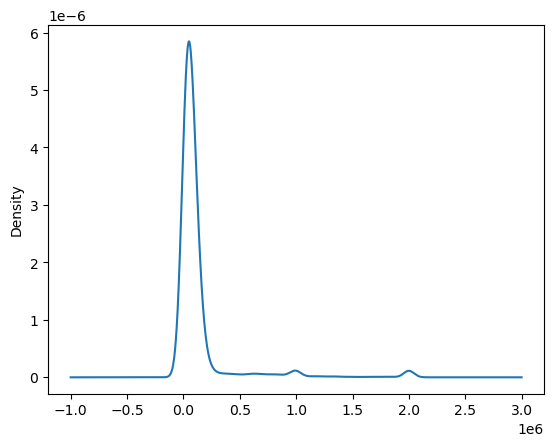

In [44]:
df['ConvertedComp'].plot(kind='kde')

Plot the histogram for the column `ConvertedComp`.


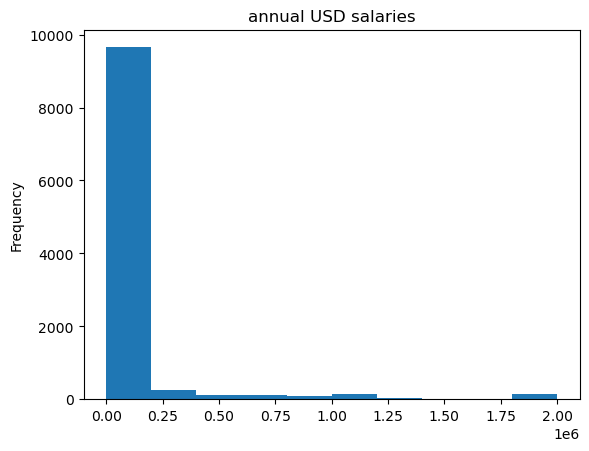

In [19]:
# your code goes here
df['ConvertedComp'].plot(kind='hist')
plt.title('annual USD salaries')
plt.show()

What is the median of the column `ConvertedComp`?


In [31]:
# your code goes here
median = df['ConvertedComp'].median()
print('median of ConvertedComp:', median)

median of ConvertedComp: 57745.0


How many responders identified themselves only as a **Man**?


In [34]:
# your code goes here
# count value in gender column
vc = df['Gender'].value_counts()

# convert to Dict
d = dict(vc)
d

# print
print('number of responders identified themselves only as a Man:', d['Man'])

number of responders identified themselves only as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [43]:
# your code goes here

# construct sub-df 
df_sub = df[['ConvertedComp','Gender']]

# group by gender, calc median
df_grp = df_sub.groupby(['Gender']).median()

# get woman median salary
w = df_grp.loc['Woman']['ConvertedComp']

#print
print('median salary of Woman:', w)

median salary of Woman: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [65]:
# your code goes here
d = df[['Age']].describe()
d

,Age
count,11111.000000
mean,30.778895
std,7.393686
min,16.000000
25%,25.000000
50%,29.000000
75%,35.000000
max,99.000000


In [71]:
d.loc['min']

Age    16.0
Name: min, dtype: float64

In [77]:
print('min:',d.loc['min','Age'])
print('q1:',d.loc['25%','Age'])
print('median:',d.loc['50%','Age'])
print('q3:',d.loc['75%','Age'])
print('max:',d.loc['max','Age'])

min: 16.0
q1: 25.0
median: 29.0
q3: 35.0
max: 99.0


Plot a histogram of the column `Age`.


<AxesSubplot:ylabel='Frequency'>

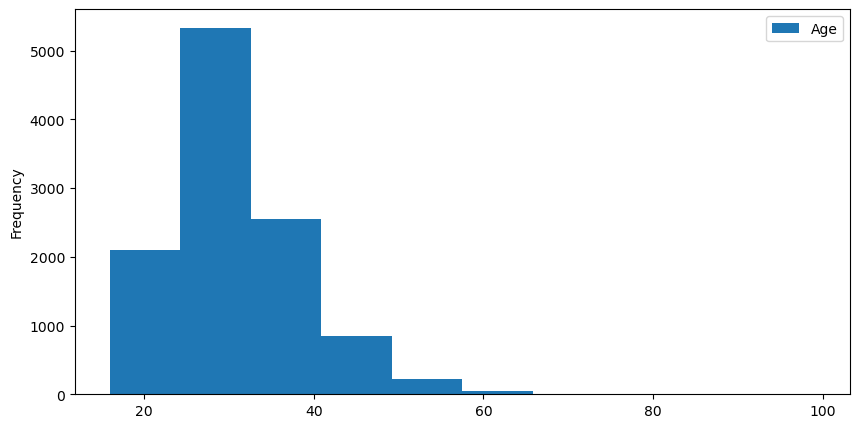

In [79]:
# your code goes here
df[['Age']].plot(kind='hist', figsize=(10,5))

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


<AxesSubplot:>

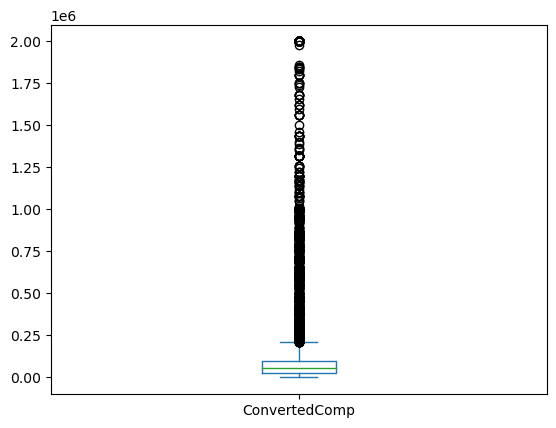

In [80]:
# your code goes here
df[['ConvertedComp']].plot(kind='box')

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [86]:
# your code goes here
q3, q1 = df['ConvertedComp'].quantile([0.75 ,0.25])
iqr = q3 - q1
iqr

73132.0

Find out the upper and lower bounds.


In [87]:
# your code goes here
ub = q3 + (1.5 * iqr)
lb = q1 - (1.5 * iqr)
ub , lb

(209698.0, -82830.0)

Identify how many outliers are there in the `ConvertedComp` column.


In [94]:
# your code goes here
df[['ConvertedComp']][df['ConvertedComp']>ub].shape

(879, 1)

Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [97]:
# your code goes here
df_new = df[df['ConvertedComp']<=ub]
df_new.shape

(9703, 85)

In [104]:
df_new[['ConvertedComp']].describe()

,ConvertedComp
count,9703.000000
mean,59883.208389
std,43394.336755
min,0.000000
25%,24060.000000
50%,52704.000000
75%,85574.500000
max,209356.000000


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [101]:
# your code goes here
df.corr()['Age'].sort_values()

CodeRevHrs      -0.020469
Respondent       0.004041
CompTotal        0.006970
WorkWeekHrs      0.036518
ConvertedComp    0.105386
Age              1.000000
Name: Age, dtype: float64

In [102]:
df[['Age']].describe()

,Age
count,11111.000000
mean,30.778895
std,7.393686
min,16.000000
25%,25.000000
50%,29.000000
75%,35.000000
max,99.000000


## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
